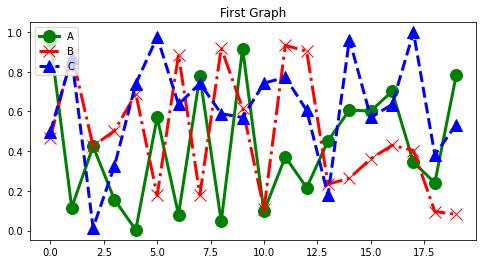

In [1]:
import matplotlib.pyplot as plt
import numpy as np 
fig, ax = plt.subplots(figsize=(8,4))

ax.plot(np.random.rand(20),label='A', c='g', marker='o', ls='-', markersize=12, linewidth=3)
ax.plot(np.random.rand(20),label='B', c='r', marker='x', ls='-.', markersize=12, linewidth=3)
ax.plot(np.random.rand(20),label='C', c='b', marker='^', ls='--', markersize=12, linewidth=3)
ax.set_title('First Graph')
plt.legend(loc=2)
plt.show()





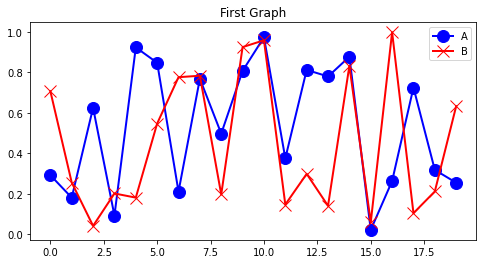

In [3]:
import matplotlib.pyplot as plt
import numpy as np 
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(np.random.rand(20), label='A', c='b', marker='o', markersize=12, linewidth=2)
ax.plot(np.random.rand(20), label='B', c='r', marker='x', markersize=12, linewidth=2)
ax.set_title('First Graph')
plt.legend(loc=1)
plt.show()


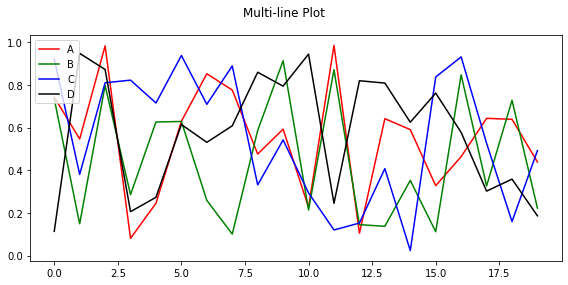

In [4]:
nplots = 4

labels = ['A','B','C','D']
colors = ['r','g','b','k']
fig, ax = plt.subplots(figsize=(8,4))

def addPlot(i,ax):
    ax.plot(np.random.rand(20), label=labels[i], c=colors[i])
    ax.legend(loc=2)
    
for i in range(nplots):
    addPlot(i, ax)     
fig.suptitle('Multi-line Plot')
fig.tight_layout()
plt.show()

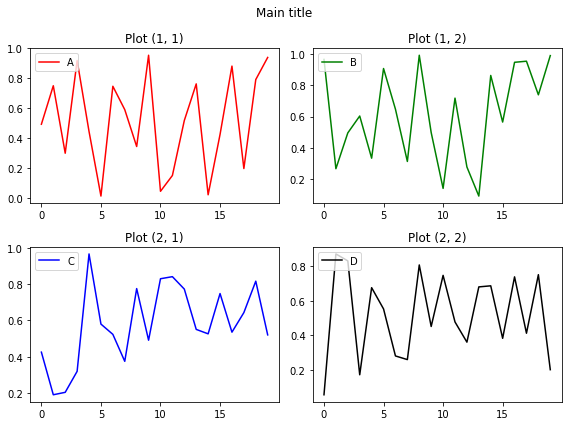

In [5]:
n_rows = 2
n_cols = 2

labels = [['A','B'],['C','D']]
colors = [['r','g'],['b','k']]
fig, axes = plt.subplots(n_rows,n_cols,figsize=(8,6))
axes
for row_num in range(n_rows):
    for col_num in range(n_cols):
        ax = axes[row_num][col_num]
        ax.plot(np.random.rand(20), label=labels[row_num][col_num], c=colors[row_num][col_num])
        ax.set_title(f'Plot ({row_num+1}, {col_num+1})')
        ax.legend(loc=2)
        
fig.suptitle('Main title')
fig.tight_layout()
plt.show()


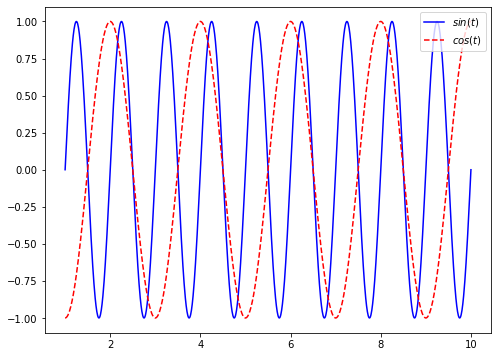

In [2]:
t = np.linspace(1, 10, 1000)
plt.figure(figsize=(8, 6))
line1, = plt.plot(t, np.sin(t * 2 * np.pi), 'b-', label='$sin(t)$')
line2, = plt.plot(t, np.cos(t * 2 * np.pi/2), 'r--', label='$cos(t)$')

plt.legend(loc='upper right')

## plot histograms with and without density (normalizing). With normalization these are probabilities since total area = 1

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
data = np.random.normal(0, 1.5, 100)
mean, var = stats.distributions.norm.fit(data)
x = np.linspace(-5, 5, 100)
fitted_data = stats.distributions.norm.pdf(x, mean, var)
# plot figure 
plt.figure(figsize=(8,6))
plt.hist(data, density=True, alpha=0.5)
plt.plot(x, fitted_data, 'b-')
plt.show()
var

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
data = np.random.normal(0, 2.5, 1000)
plt.figure(figsize=(8,6))
plt.hist(data, alpha=0.4, density=True)
plt.show()

(1.7370942638441165, 2.686199014557706, 18.91411832813299, 10.61964492300753)
beta


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:2429: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


Text(0, 0.5, 'Frequency')

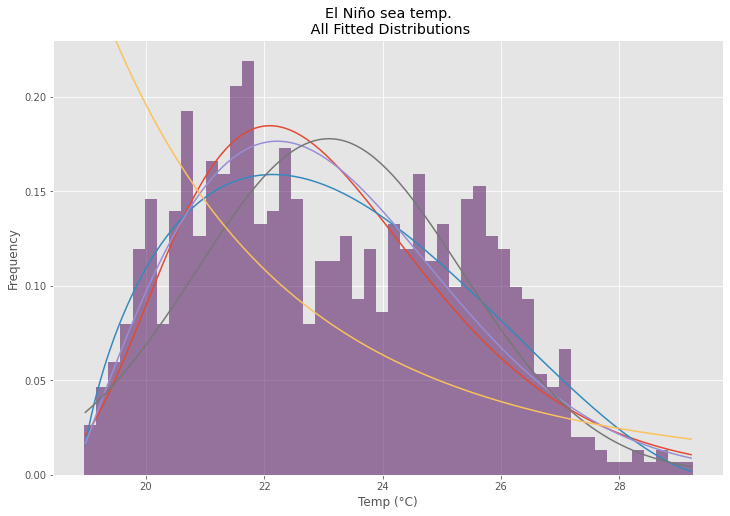

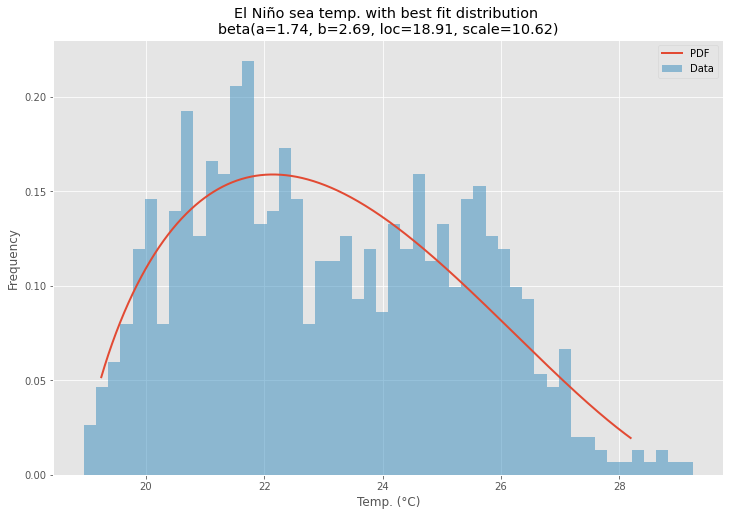

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st
#import statsmodels as sm
import statsmodels.api as sm
from scipy.stats._continuous_distns import _distn_names
import matplotlib
import matplotlib.pyplot as plt


matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
matplotlib.style.use('ggplot')

# Create models from data
def best_fit_distribution(data, bins=200, ax=None):
    """Model data by finding best fit distribution to data"""
    # Get histogram of original data
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0
  

    # Best holders
    best_distribution = st.norm
    best_params = (0.0, 1.0)
    best_sse = np.inf
  
    # Estimate distribution parameters from data
    dist_names = ['gamma', 'beta', 'rayleigh', 'norm', 'pareto']

    for dist_name in dist_names:
        distribution = getattr(st, dist_name)
        # Separate parts of parameters
        params = distribution.fit(data)
        arg = params[:-2]
        loc = params[-2]
        scale = params[-1]

        # Calculate fitted PDF and error with fit in distribution
        pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
        sse = np.sum(np.power(y - pdf, 2.0))

        # if axis pass in add to plot
        try:
            if ax:
                pd.Series(pdf, x).plot(ax=ax)
            end
        except Exception:
            pass

        # identify if this distribution is better
        if best_sse > sse > 0:
            best_distribution = distribution
            best_params = params
            best_sse = sse

    return (best_distribution.name, best_params)

def make_pdf(dist, params, size=10000):
    """Generate distributions's Probability Distribution Function """

    # Separate parts of parameters
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]

    # Get sane start and end points of distribution
    start = dist.ppf(0.01, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.01, loc=loc, scale=scale)
    end = dist.ppf(0.99, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.99, loc=loc, scale=scale)

    # Build PDF and turn into pandas Series
    x = np.linspace(start, end, size)
    y = dist.pdf(x, loc=loc, scale=scale, *arg)
    pdf = pd.Series(y, x)

    return pdf

# Load data from statsmodels datasets
data = pd.Series(sm.datasets.elnino.load_pandas().data.set_index('YEAR').values.ravel())

# Plot for comparison
plt.figure(figsize=(12,8))

# plot using pandas plotting - note that "denstiy = True" normalizes the data (so area is unity)
ax = data.plot(kind='hist', density=True, bins=50, alpha= 0.5,cmap='viridis')
# Save plot limits
dataYLim = ax.get_ylim()

# Find best fit distribution
best_fit_name, best_fit_params = best_fit_distribution(data, 200, ax)
print(best_fit_params)

best_dist = getattr(st, best_fit_name)
print(best_fit_name)

# Update plots
ax.set_ylim(dataYLim)
ax.set_title(u'El Niño sea temp.\n All Fitted Distributions')
ax.set_xlabel(u'Temp (°C)')
ax.set_ylabel('Frequency')

# Make PDF with best params 
pdf = make_pdf(best_dist, best_fit_params)

# Display
plt.figure(figsize=(12,8))
ax = pdf.plot(lw=2, label='PDF', legend=True)
data.plot(kind='hist', bins=50,  density=True, alpha=0.5, label='Data', legend=True, ax=ax)

param_names = (best_dist.shapes + ', loc, scale').split(', ') if best_dist.shapes else ['loc', 'scale']
param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_fit_params)])
dist_str = '{}({})'.format(best_fit_name, param_str)

ax.set_title(u'El Niño sea temp. with best fit distribution \n' + dist_str)
ax.set_xlabel(u'Temp. (°C)')
ax.set_ylabel('Frequency')